# Problem #1

Perceptron, Support Vector Machine (SVM), Decision Tree, Random Forest are all types of classifying models. The method of determining decision boundaries varies among classifiers.

For the perceptron, we optimize feature weights via minimalizing a loss function (a function of the weights) through gradient descent. The perceptron's predicted value is the weighted sum of an instance's features. This value is passed through an activation function, that determines an instance's class based on a numerical threshold. The decision boundary is a hyperplane.

SVM utilizes special instances in the feature space as references (the support vectors) to determine the decision boundaries. These boundaries can be linear and non-linear depending on the kernel method utilized. Tuning hyperparameters allow for how sensitive to draw the support vectors. This aids in preventing under/overfitting. Ideally, the support vectors are trying to maximize their distance from the boundary, while minimizing the misclassificaiton rate.

Decision Trees rely on determining a threshold for each feature. This continuous splitting of feature values aims to gain the most information from the data observing the decrease in entropy. A decision tree can split for all or some selected features. Eventually, an instance can be classified by traversing the decision tree's cut off values of the selected features.

A random forest is similar to a decision tree, in that it utilizes mulitple decision trees. Each decision tree only splits on a number of random features. Through this method, it helps prevent overfitting.


For a first run at classification for a particular dataset, I would want a fast and non-memory-intensive algorithm. Thus, I would choose the basic perceptron with stochastic gradient descent. SVM requires to considering all data points when finding the support vectors and drawing the decision boundary. Also, non-linear kernels add to the extra memory required to calculate. Decision trees and random forrests can be more complicated in finding the optimal splits especially dealing with datasets in high dimensions. Therefore, the preceptron is the fastest and most simple as we just need to optimize the weights and reduce the loss with 1 instance each iteration of gradient descent

# Problem #2

**Numerical**: This represents any number value. Integers are of *int* type while decimals are *float*
- 4, 5.6

**Nominal**: This is data that are represented as *string* type. They are strings that have a descriptive value
- "cat", "blue"

**Date**: Represents a specific date and time. The exact data type is **datetime**. The specific format of the datetime value can be formated by the user.
- March 14, 2014

**Text**: A series of strings. A feature for a dataset can be "Documents", where for each instance, a document contains text with an appropriate description. An example can be document text for a patient's medical history.
- "Diabetes Type 1. Past surgeries present: None"

**Image**: A pictorial representation. We can represent an image as an array of rgb values. The r channel is one array containing arrays representing the spatial rows of the picture. Within each row array are the r values for each column of the picture. For rgb, we would have 3 channels of the same structure.

```python
img = [[[1,1,1],[1,1,1]],
       [[2,2,2],[2,2,2]],
       [[3,3,3],[3,3,3]]]
```
Above is an image array with rgb channels. If each pixel has a value, then this imageis 3x2 pixels

**Dependent Variable**: The variable that we are trying to predict. For classification, it would be the class of an instance. For a regression problem, it would be a numerical value. The dependent variable is an output dependent on the values of the other features in the dataset.
- "survived / not survived"  titantic dataset: status of passengers
- $4.50  predicted stock price

# Problem #3

TP: True Positive
FP: False Positive
TN: True Negative
FN: False Negative

**Recall**: TP / (TP + FN)

**Precision**: TP / (TP + FP)

Above are 2 common classification metrics in addition to accuracy. Recall measures how much of one class the model was able to classify correctly out of all the actual instances belonging to that class. A model has poor recall if it cannot detect its desired class consistently.

Precision means that out of all the instances was was labeled a certain class, what proportion of those actually belonged to that class. A model's precision tests whether it can be correct in its classification or not.

# Problem #4

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
display(df.head())
print(df.shape)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


(400, 9)


In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Correlation between 2 features is calculated by: Covariance(F1, F2) / (SD1 * SD2)

That is, it is the division the features' covariance by the product of their standard deviations.

We do not need Serial No. feature as it is a derived feature with no inherent effect on any of the other features.

In [5]:
# drop 'Serial No.'
df.drop(['Serial No.'], axis=1, inplace=True)

# fix 'LOR ' column name to 'LOR'
df.rename(columns={'LOR ':'LOR'}, inplace=True)

display(df.head())

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
def mean(feature_col):
    n = len(feature_col)
    
    tot = 0
    
    for i in range(n):
        tot = tot + feature_col[i]
        
    return tot / n

In [7]:
def std(feature_col):
    n = len(feature_col)
    
    tot = 0
    
    avg = mean(feature_col)
    
    for i in range(n):
        tot = tot + ((feature_col[i] - avg)**2)
    
    s = math.sqrt((1/(n-1)) * tot)
    
    return s

In [8]:
def covariance_std(f1, f2):
    avg1 = mean(f1)
    avg2 = mean(f2)
    
    cov = 0
    
    for i in range(len(f1)):
        cov = cov + ((f1.iloc[i] - avg1) * (f2.iloc[i] - avg2))
    
    cov = cov / (len(f1) - 1)
    
    std1 = std(f1)
    std2 = std(f2)
    
    return cov, std1, std2

In [9]:
def corr_matrix(df):
    dim = df.shape[1]
    
    matrix = np.zeros((dim,dim))
    
    col = 0
    
    for i in range(dim):
        for j in range(col, dim):
            cov, std1, std2 = covariance_std(df.iloc[:,i], df.iloc[:,j])
            
            corr = cov / (std1 * std2)
            
            matrix[i,j] = corr
        
        col = col + 1
    
    return matrix

<AxesSubplot:>

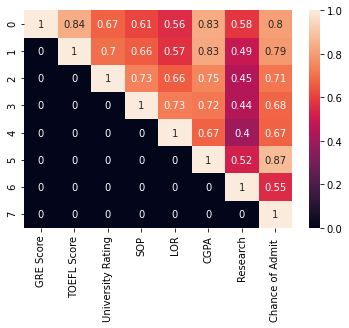

In [10]:
# generate correlation matrix
matrix = corr_matrix(df)

# convert matrix array to dataframe to get feature headers
matrix_df = pd.DataFrame(matrix, columns=df.columns)

# display correlation matrix
# note x-axis has feature names, while y-axis has the feature number. They both mean the same thing
sns.heatmap(matrix_df, annot=True)

<AxesSubplot:>

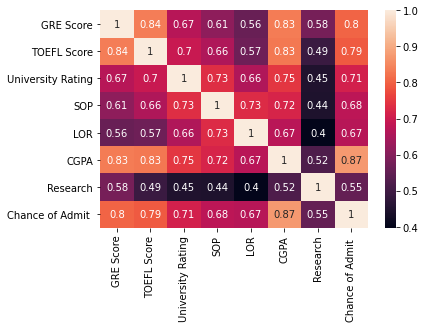

In [11]:
# verify using pandas
sns.heatmap(df.corr(), annot=True)

We see from above that the manual implementation matches with the pandas correlation method.

The diagonal of 1's represents each feature's correlation with itself. A feature will always correlate perfectly with itself, hence the 1. 

We observe that 'GRE Score' and 'TOEFL Score' has the highest correlation among the independent features at 0.84. This means that perhaps there is collinearity occuring and we can drop one of these two features. This is more the case since both the features correlate with the dependent variable 'Chance of Admission' closely around 0.8 and 0.79 respectively.

The most important variable would be the one with the highest correlation to the dependent variable. In this case, it is 'CGPA' at 0.87